In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import display
import ipywidgets as widgets
import os

def show_grid(images, titles, rows=2, cols=3, cmaps=None, size=(15, 8)):
    """نمایش تصاویر در grid با عناوین"""
    plt.figure(figsize=size)
    if cmaps is None:
        cmaps = [None] * len(images)

    for i, (img, title, cmap) in enumerate(zip(images, titles, cmaps), 1):
        plt.subplot(rows, cols, i)
        if cmap == 'gray':
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def contours_pipline(img):
    hsv = cv2cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([120 - 10, 90, 80], dtype=np.uint8)
    upper_blue = np.array([120 + 10, 255, 255], dtype=np.uint8)

    lowe_red1 = np.array([10 - 10, 100, 90], dtype=np.uint8)
    upper_red1 = np.array([10 + 10, 255, 255], dtype=np.uint8)
    lowe_red2 = np.array([160 - 10, 100, 90], dtype=np.uint8)
    upper_red2 = np.array([160 + 10, 255, 255], dtype=np.uint8)

    lower_green = np.array([60 - 10, 100, 110], dtype=np.uint8)
    upper_green = np.array([60 + 10, 255, 255], dtype=np.unit8)

    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = mask1 + mask2
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
    res_red = cv2.bitwise_and(img, img, mask=mask_red)
    res_green = cv2.bitwise_and(img, img, mask=mask_green)

    contours, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, CV2.CHAIN_APPROX_SIMPLE)
    contours, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, CV2.CHAIN_APPROX_SIMPLE)
    contours, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, CV2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
    return img

folder_path = '/contact/'
image_files = [f for f in os.listdir(".") if f.lower().endswith(".jpg")]
print(f"{len(image_files)} pictures were found")

images = []
titles = []

for i, f in enumerate(image_files):
    image_file = os.path.join(folder_path, f)
    img = cv2.imread(image_file)
    print(f"نام فایل: {f}")

    result = contours_pipline(img)
    images.extend([img, , res_red, res_blue, res_green, result])
    titles.extend([f"Original: {f}", "res_mask", "res_blue", "res_green"])
show_grid(images, titles, rows=1, cols=5, cmaps=cmaps, size=(15,5))


1 pictures were found
پردازش: objects.jpg


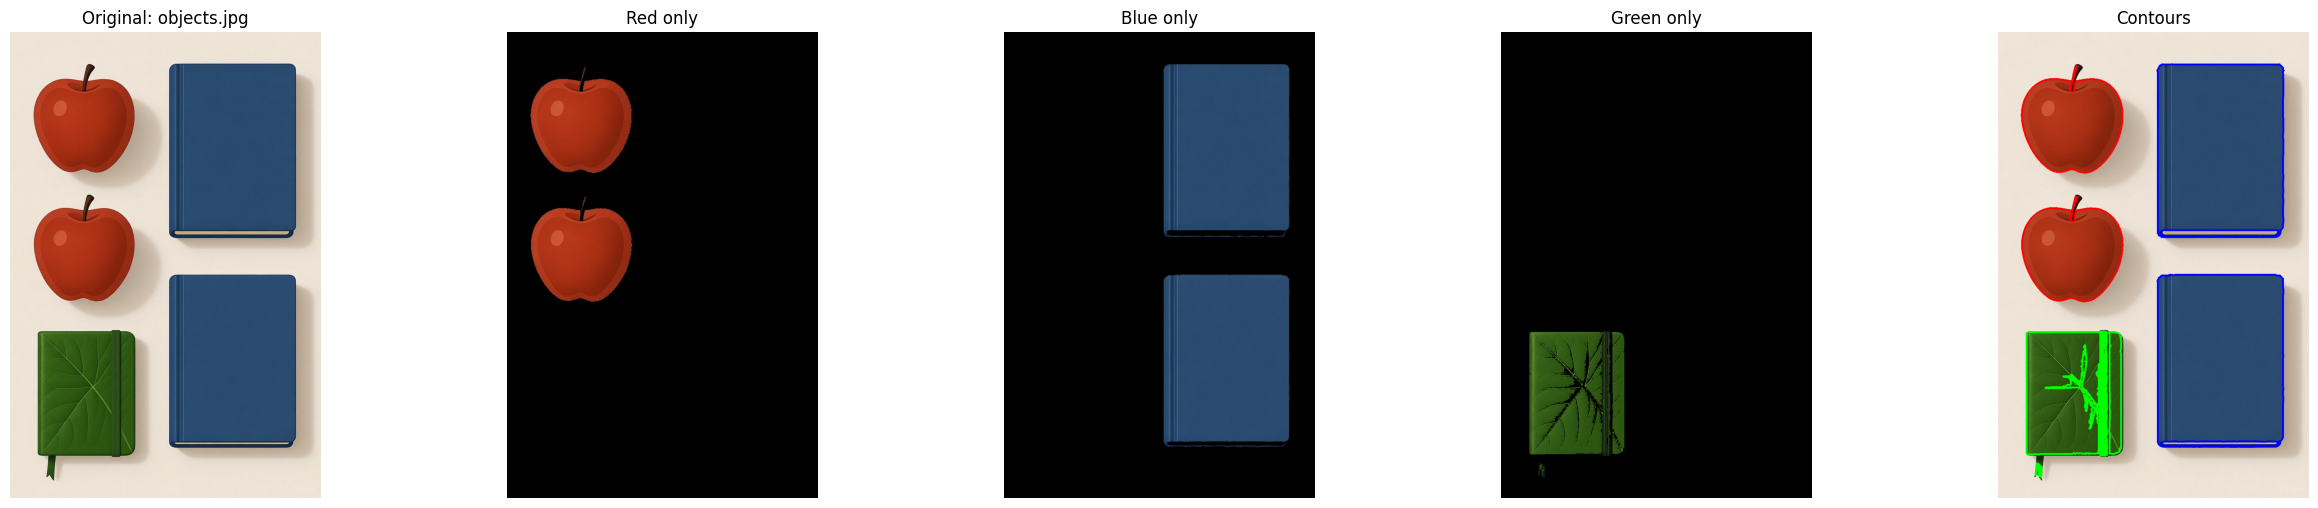

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import display
import ipywidgets as widgets
import os

def show_grid(images, titles, rows=2, cols=3, cmaps=None, size=(15, 8)):
    """نمایش تصاویر در grid با عناوین"""
    plt.figure(figsize=size)
    if cmaps is None:
        cmaps = [None] * len(images)

    for i, (img, title, cmap) in enumerate(zip(images, titles, cmaps), 1):
        plt.subplot(rows, cols, i)
        if cmap == 'gray':
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def contours_pipeline(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # بازه‌های HSV برای هر رنگ
    lower_blue = np.array([95, 80, 70], dtype=np.uint8)
    upper_blue = np.array([130, 255, 255], dtype=np.uint8)

    lower_red1 = np.array([0, 100, 90], dtype=np.uint8)    # 10±10
    upper_red1 = np.array([20, 255, 255], dtype=np.uint8)
    lower_red2 = np.array([150, 100, 90], dtype=np.uint8)  # 160±10
    upper_red2 = np.array([170, 255, 255], dtype=np.uint8)

    lower_green = np.array([45, 120, 80], dtype=np.uint8)
    upper_green = np.array([80, 255, 255], dtype=np.uint8)

    # ساخت ماسک‌ها
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = mask_red1 + mask_red2  # mask1 + mask2 → mask_red1 + mask_red2
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # تصاویر فیلترشده
    res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
    res_red = cv2.bitwise_and(img, img, mask=mask_red)
    res_green = cv2.bitwise_and(img, img, mask=mask_green)

    # پیدا کردن کانتورها برای هر رنگ (جداگانه)
    contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # رسم کانتورها روی تصویر اصلی (رنگ‌های مختلف برای تفکیک)
    result = img.copy()
    cv2.drawContours(result, contours_blue, -1, (255, 0, 0), 3)    # آبی
    cv2.drawContours(result, contours_red, -1, (0, 0, 255), 3)     # قرمز
    cv2.drawContours(result, contours_green, -1, (0, 255, 0), 3)   # سبز

    return result, res_blue, res_red, res_green  # برگرداندن همه نتایج

# بارگذاری و پردازش تصاویر
folder_path = '/content/'  # /contact/ → /content/
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(f"{len(image_files)} pictures were found")

all_images = []
all_titles = []

for i, f in enumerate(image_files):
    image_path = os.path.join(folder_path, f)
    img = cv2.imread(image_path)
    if img is None:
        print(f"خطا در بارگذاری: {f}")
        continue

    print(f"پردازش: {f}")

    # اجرای pipeline
    result, res_blue, res_red, res_green = contours_pipeline(img)

    # اضافه کردن به لیست نمایش
    all_images.extend([
        img,           # Original
        res_red,       # Red only
        res_blue,      # Blue only
        res_green,     # Green only
        result         # Final with contours
    ])
    all_titles.extend([
        f"Original: {f}",
        "Red only",
        "Blue only",
        "Green only",
        "Contours"
    ])

# نمایش نهایی
if all_images:
    show_grid(all_images, all_titles, rows=2, cols=5, size=(25, 10))
else:
    print("هیچ تصویری پیدا نشد!")
